In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Problem Statement:

Analyzing different factors affecting the demand of shared electric cylecs in the Indian market.

In [ ]:
data=pd.read_csv("/content/bike_sharing.txt")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Description of the data:Summary Statistics


In [126]:
data['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

There is a significant difference between mean(**191.574**) and median(**145**) of the **count** column  which indicates it contains outliers.

In [127]:
data['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [128]:
data['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

Also there are outliers in the columns **casual** and **registered** as there is a siginificant difference betwee mean and median

Minimum **casual** users is 0 and maximum is **367**

Minimum **registered** users is 0 and maximum is **886**

In [129]:
data['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [130]:
data['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [132]:
data['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

The columns **temp** ,**atemp**,**humidity**,and **windspeed** seems to be free from outliers as there is not much significant difference between means and medians

# Missing values

In [ ]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No missing value in the data

# Frequency distribution of the values of some columns

In [ ]:
# replace season with descriptive name
data['season']=data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

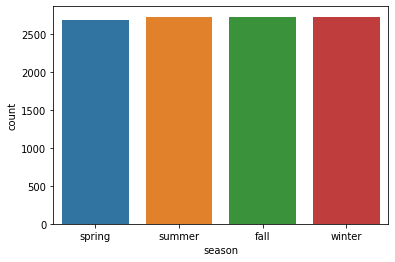

In [ ]:
data['season'].value_counts().sort_values(ascending=False)
sns.countplot(x='season',data=data)

The data distribution for different seasons is almost same

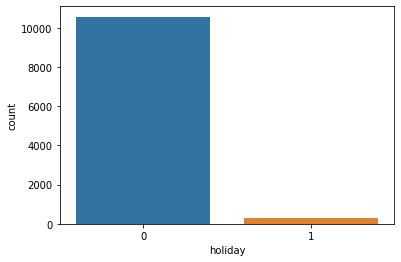

In [ ]:
data['holiday'].value_counts().sort_values(ascending=False)
sns.countplot(x='holiday',data=data)

It makes sense of the distribution of data as there are not many holidays in a year

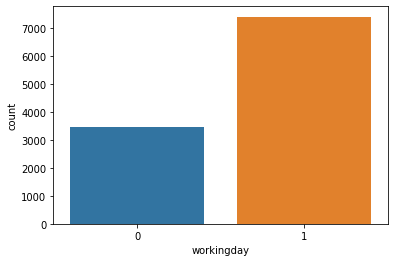

In [ ]:
data['workingday'].value_counts().sort_values(ascending=False)
sns.countplot(x='workingday',data=data)

Excluding holidays and weekend it makes sense of the distribution of the data

In [ ]:
# convert datetime column into datetime object
data['datetime']=pd.to_datetime(data['datetime'])

In [ ]:
data['datetime'].dt.year.unique()

array([2011, 2012])

data collected for the years **2011 and 2012**

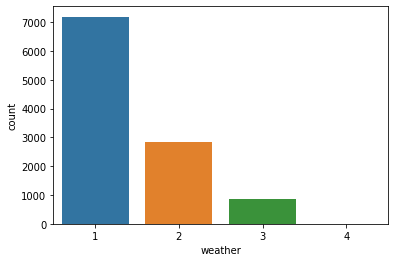

In [ ]:
data['weather'].value_counts().sort_values(ascending=False)
sns.countplot(x='weather',data=data)

It makes sense that during thunderstorm or heavy rain(**weather=4**)  the people would not go outside for bicyle ride.Still we have some users who dared to went outside for a bicyle ride

In [ ]:
data['casual'].value_counts().sort_values(ascending=False)

0      986
1      667
2      487
3      438
4      354
      ... 
310      1
245      1
297      1
299      1
304      1
Name: casual, Length: 309, dtype: int64

There are heavy of number of non casual users (**986**) 

In [ ]:
data[data['casual']==367] # max casual users

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6729,2012-03-17 16:00:00,spring,0,0,1,26.24,31.06,50,0.0,367,318,685


During weekend in the spring season in the year 2012 at 4 PM company witnessed maximum number of casual users.Also it was a clear weather.

In [ ]:
data['registered'].value_counts().sort_values(ascending=False)

3      195
4      190
5      177
6      155
2      150
      ... 
694      1
650      1
559      1
666      1
636      1
Name: registered, Length: 731, dtype: int64

On the other hand 195 times of the years **2011** and **2012** there are three users registered for bike rentals

In [ ]:
data[data['registered']==886] # maximum registered 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,fall,0,1,1,27.06,31.06,44,16.9979,91,886,977


In the year 2012 september, during fall with clear sky at 6 PM company registed 886 number of users.

Reason: Workingday,clear sky,low humidity and temperature was also good.

# Relationship between windpseed,temp,humidity,and count

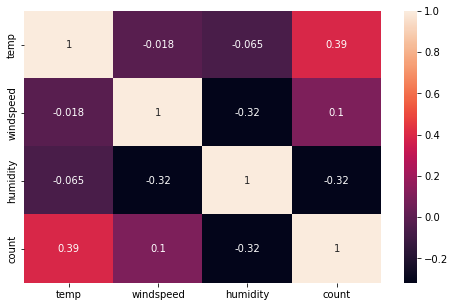

In [148]:
fig,ax=plt.subplots(figsize=(8,5))
correlation=data[['temp','windspeed','humidity','count']].corr(method='pearson') # pearson correlation
sns.heatmap(correlation,annot=True)

The pearson correlation between count and temp is **0.39** which is also heighest among all correlation values.

Second heighest is -0.32 but in negative quantity between count and humidity

# Scatter plot between temp and count

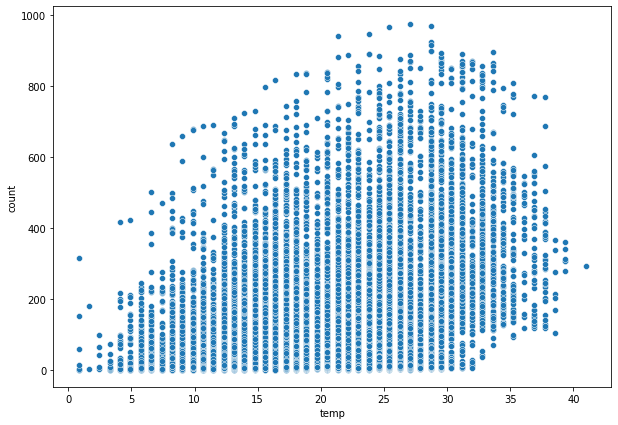

In [145]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(x='temp',y='count',data=data)
plt.show()

From scatter plot as well as from correlation values temperature plays an important role in rental counts.

**With temperature (20 to 30) rental counts is good but as soon as temperature reaches more than 35 degree, there is not much rentals.**

**On the other hand when temperature is below 10 degree there is also number of rentals**

These makes sense as obviously in low temperature people don't bother to ride cycle and similarly in high temperature.


# Scatter plot between count and humidity 

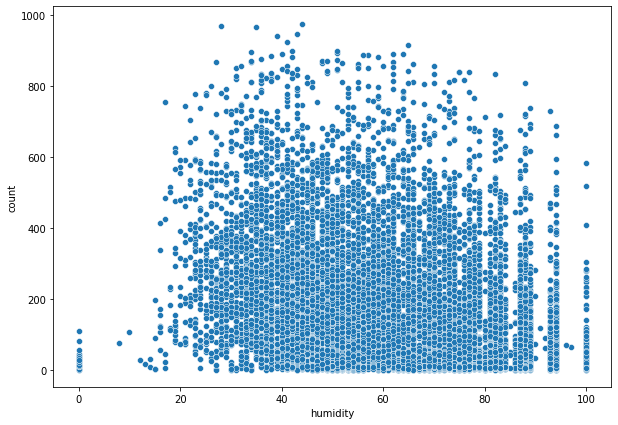

In [146]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(x='humidity',y='count',data=data)
plt.show()

Though there are some outliers but most of the rentals falls 600.
On the other hand the as humidity there are less people going for bicyle ride.  

# Visual Representation of data as well as hypothesis testing

According to summary statistics only **count** column has outliers

So we will check for outliers for count with respect to workingday,seasons,weather and holidays

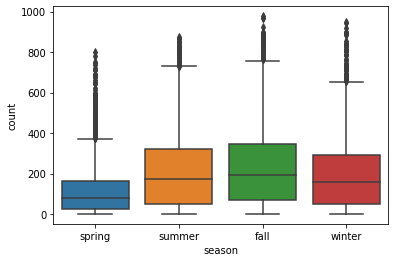

In [ ]:
sns.boxplot(data=data,x='season',y='count')

According to boxplot there are heavy number of outliers for all the season.

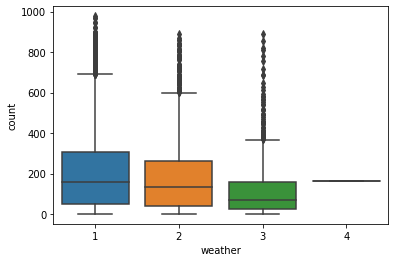

In [ ]:
sns.boxplot(data=data,x='weather',y='count') # box plot for count vs weather

Again the count has outliers with respect to each weather category

# ANOVA for number of rentals with respect to different seasons



Assumptions:

1. Each group's(season) sample is gaussian

2. Each gp's variance is roughly the same

3. Each observation is independent i.e number of bike rentals in 2011 at 6PM is independent of number of bike rentals at 7 PM.

We will consider that the data already follows third assumption.For the rest two assumptions we need some bit of work.

**H0:Each group's means are same i.e average number of bike rentals is similar in different season**

**H1:otherwise**

#### Check for **Gaussianity** of each season's bike rentals



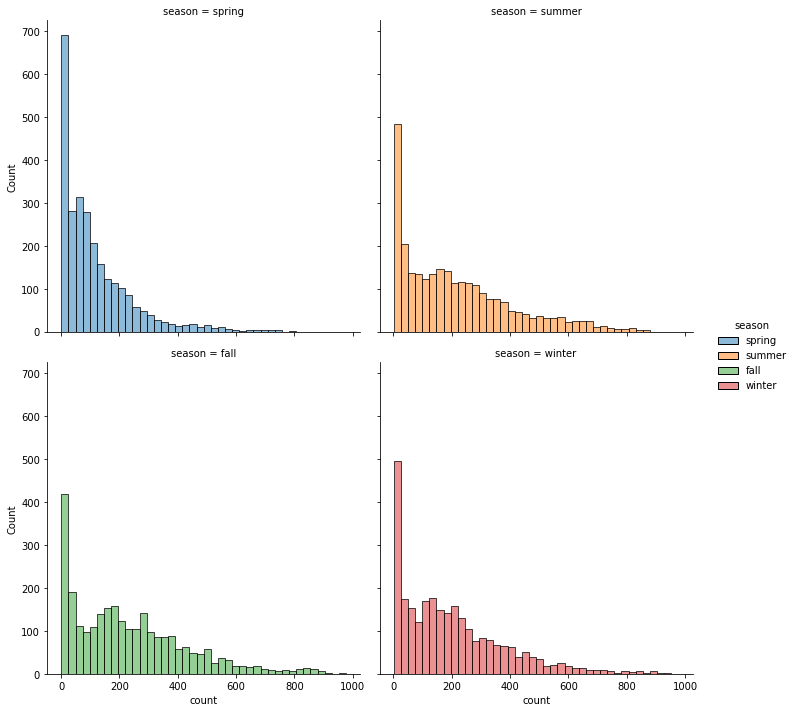

In [ ]:
# histogram plot
sns.displot(data=data,x='count',col='season',col_wrap=2,hue='season',kind='hist',bins=40)

It is clearly visible from the plot that the data for each seasons are right skewed ,so clearly they are not normally distributed.

Nevertheless the distribution is almost identical for each season

## QQ plot

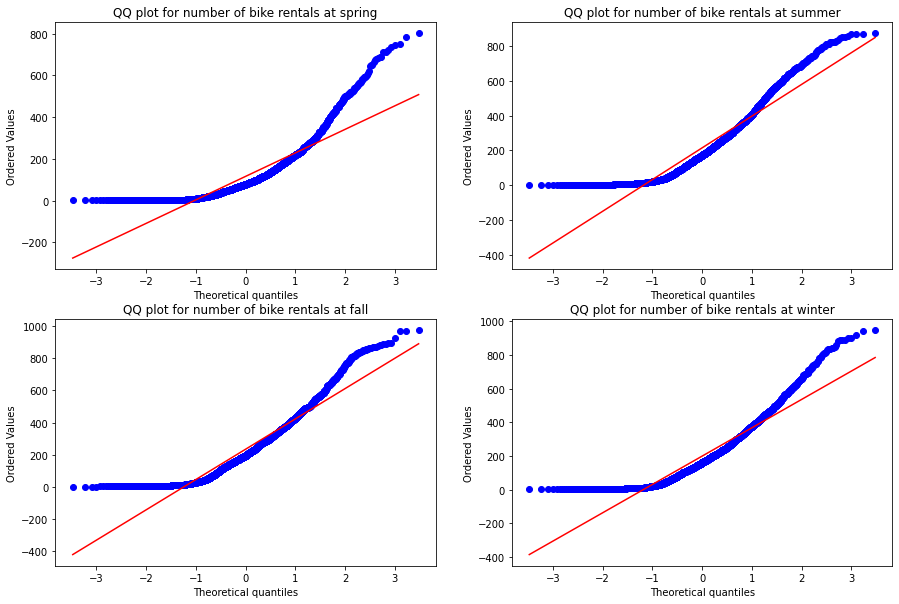

In [46]:
# QQ -plot
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten() # flatten the axes as ax was a 2D array ,flattening makes it a 1D array
seasons=data['season'].unique()

for i in range(4):
  season_data=data[data['season']==seasons[i]]['count']
  st.probplot(season_data, dist="norm", plot=ax[i]) # quantile plot with respect to theoretical normal data
  ax[i].set_title(f"QQ plot for number of bike rentals at {seasons[i]}")
plt.show()

Clearly the data are not normaly distributed

# Shapior-WIlk test for normality

  **H0: a sample x1, ..., xn came from a normally distributed population.** 

  **H1: Otherwise**

In [ ]:
seasons=data['season'].unique()
for s in seasons:
  print(f"Testing for normality of bike rentals in {s}:")
  test=st.shapiro(data[data['season']==s]['count'].to_numpy())
  print(test)
  print("****************************************************")
  print()

Testing for normality of bike rentals in spring:
ShapiroResult(statistic=0.8087379336357117, pvalue=0.0)
****************************************************

Testing for normality of bike rentals in summer:
ShapiroResult(statistic=0.9004813432693481, pvalue=6.038565025570219e-39)
****************************************************

Testing for normality of bike rentals in fall:
ShapiroResult(statistic=0.9148167371749878, pvalue=1.0437356147871525e-36)
****************************************************

Testing for normality of bike rentals in winter:
ShapiroResult(statistic=0.8954642415046692, pvalue=1.130082751748606e-39)
****************************************************



For all the data the p-values are very less.Even with 0.1% level of significance, the null hypothesis can not be saved i.e the data are not normaly distributed

### Anderson Darling test for normality

**H0: Samples drawn from normal distribution**

**H1:They are not**

In [38]:
seasons=data['season'].unique()
for s in seasons:
  print(f"Testing for normality of bike rentals in {s}:")
  test=st.anderson(data[data['season']==s]['count'].to_numpy(),dist='norm')
  print(test)
  print("****************************************************")
  print()

Testing for normality of bike rentals in spring:
AndersonResult(statistic=134.99126589743582, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
****************************************************

Testing for normality of bike rentals in summer:
AndersonResult(statistic=73.98826756049948, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
****************************************************

Testing for normality of bike rentals in fall:
AndersonResult(statistic=54.3859876350034, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
****************************************************

Testing for normality of bike rentals in winter:
AndersonResult(statistic=70.89794313022367, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. 

**If the returned statistic is larger than the returned critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected.** 

Test statistic for every samples is way larger than the all the crictical values which indicates null hypothesis must be rejected i.e the samples are not drawn from normal distribution

## Second Assumption: Test for equal variance

**F-test**: For equal variance.For sample 1 and sample 2

Note: F-test is estremely sensitive to non-normality of samples 1 and samples2 

**H0:The variance of two samples are equal**
**H1:otherwise**

Test statistic in F-test follows F-distribution under null hypothesis

In [39]:
# F-test : This is just for demonstration purposes
s1='fall' # fall season
s2='spring' # season spring
variance_fall=np.var(data[data['season']==s1]['count'],ddof=1)
variance_spring=np.var(data[data['season']==s2]['count'],ddof=1)
df1=len(data[data['season']==s1]['count'])-1 # degree of freedom for sample 1
df2=len(data[data['season']==s2]['count'])-1 # degree of freedom for sample 1

test_stat=variance_fall/variance_spring # test statistic
print("Test statistic: ",test_stat)
p_value=st.f.cdf(test_stat,df1,df2)
print("P-value: ",p_value)


Test statistic:  2.476716301276862
P-value:  0.9999999999999999


This is clearly saying the variance for bike rentals in **fall** is same as the variance in **spring**

As F-test is extremely sensitive to non-normality.Therefor we can't rely on it as the data are not normaly distrbuted

## Levene's test for equal variance: Leven's test is more robust to non-normality data compared to  F-test,bartlette test .

**H0: The variances of sample1,sample2,sample3,... are equal i.e all input samples are from populations with equal variances.**

**H1: Otherwise**

In [40]:
fall=data[data['season']=='fall']['count']
spring=data[data['season']=='spring']['count']
summer=data[data['season']=='summer']['count']
winter=data[data['season']=='winter']['count']

# center will be used in the test, since the data has
# outliers therefore use median which is very much robust to outliers
# proportiontocut is the fraction to cut off of both tails of the distribution.
# this parameter is very usefull if the data has outliers
# from both side 0.01= 1% data will be ignored
test=st.levene(fall,spring,summer,winter,center='median', proportiontocut=0.01)
print(test) 

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)


The p-value is very very less almost zero ,which indicates the variances are not equal i.e null hypothesis is not true 

## Bartlette test for equal variance:

This test is very sensitive to non-normality of data

**H0: Samples variances are equal**

**H1: Otherwise**

In [42]:
# this is just for demonstration purposes

st.bartlett(fall,winter,spring,summer) # this function has no parameters other than samples

BartlettResult(statistic=621.1563038449796, pvalue=2.611321958807742e-134)

Bartlette also says the variances are not equal as p-value is way less than 5% level of significance

### Since the data has very much outliers and also they are not normal.Hence we will perform some transformation(**Box-Cox**) to convert the data into normality(approximation)

If the transformed data are not approximately normal still we will carry out one-way anova for equality of means on the original data.

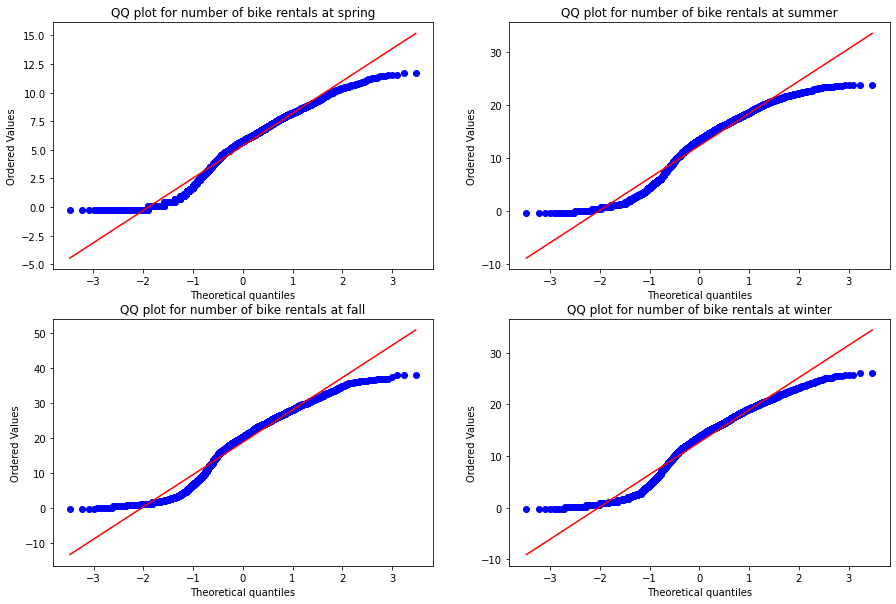

In [43]:
#fall=data[data['season']=='fall']['count']
#fall=np.log(fall+1) # add 1 to the data ,as data could have zero values 
                    # this will not affect hypothesis tesing
#spring=data[data['season']=='spring']['count']
#spring=np.log(spring+1)
#summer=data[data['season']=='summer']['count']
#summer=np.log(summer+1)
#winter=data[data['season']=='winter']['count']
#winter=np.log(winter+1)

# Now plot QQ-plot to check for normality
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten() # flatten the axes as ax was a 2D array ,flattening makes it a 1D array
seasons=data['season'].unique()

for i in range(4):
  season_data=np.log(data[data['season']==seasons[i]]['count']+1)
  season_data,_=st.boxcox(season_data)
  qq=st.probplot(season_data, dist="norm", plot=ax[i]) # quantile plot with respect to theoretical normal data
  ax[i].set_title(f"QQ plot for number of bike rentals at {seasons[i]}")
plt.show()


Even after transformation the transformed are not normal.Alos the the transformed data has outliers.

## One-way anova: Since the data has very much outliers,checking for means equality would be misleading,what we can do we can remove the outliers. Then do the necessary testing

In [ ]:
# removing outliers
fall=data[data['season']=='fall']['count']
Q1=np.quantile(fall,0.25) # first quantile is the 25th percentile
Q3=np.quantile(fall,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
fall=fall.loc[(fall<=(Q3+1.5*IQR)) & (fall>=(Q1-1.5*IQR))]

spring=data[data['season']=='spring']['count']
Q1=np.quantile(spring,0.25) # first quantile is the 25th percentile
Q3=np.quantile(spring,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
spring=spring.loc[(spring<=(Q3+1.5*IQR)) & (spring>=(Q1-1.5*IQR))]

summer=data[data['season']=='summer']['count']
Q1=np.quantile(summer,0.25) # first quantile is the 25th percentile
Q3=np.quantile(summer,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
summer=summer.loc[(summer<=(Q3+1.5*IQR)) & (summer>=(Q1-1.5*IQR))]

winter=data[data['season']=='winter']['count']
Q1=np.quantile(winter,0.25) # first quantile is the 25th percentile
Q3=np.quantile(winter,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
winter=winter.loc[(winter<=(Q3+1.5*IQR)) & (winter>=(Q1-1.5*IQR))]

# Now do the oneway anova
st.f_oneway(fall,spring,summer,winter)


F_onewayResult(statistic=340.40707265879576, pvalue=4.955446274536036e-211)

P-value is very less which indicates that the means(average number of bike rentals for each season) are not same.

Hence,no. of cycles rented is different in different seasons

## We will carry out kruskals-Wallis test: This test is non-parameteric(that is no underlying assumption for the data unlike ANOVA) and also it is robust to outliers.

**Ho:Number of bike rentals is similar in different seasons**

**H1:Number of bike rentals is different in different seasons**


In [44]:
fall=data[data['season']=='fall']['count']
spring=data[data['season']=='spring']['count']
summer=data[data['season']=='summer']['count']
winter=data[data['season']=='winter']['count']
st.kruskal(fall,spring,summer,winter)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

Since p-values is very less therefore the number of bike rentals is different in different seasons.

# KS-test: Check whether the distribution of no. of bike rentals is same both in summer and winter

**H0: Distribution of no. of bike rentals is same in both summer and winter**

**H1: They are not**

In [59]:
st.ks_2samp(data[data['season']=='winter']['count'],data[data['season']=='summer']['count'])

KstestResult(statistic=0.05133590345424572, pvalue=0.0014473767980579533)

P-value is not that much less than 5% level of significance.Since it is less than 5% level of significance we need to reject null hypothesis i.e distribution of no. of bike rentals is different in both summer and winter.

# ANOVA for number of rentals with respect to different weathers

Assumptions:

1. Each group's(weather) sample is gaussian

2. Each gp's variance is roughly the same

3. Each observation is independent i.e number of bike rentals in 2011 at 6PM is independent of number of bike rentals at 7 PM.

We will consider that the data already follows third assumption.For the rest two assumptions we need some bit of work.

**H0:Each group's means are same i.e average number of bike rentals is similar in different weather**

**H1:otherwise**

#### Check for **Gaussianity** of each weather's bike rentals


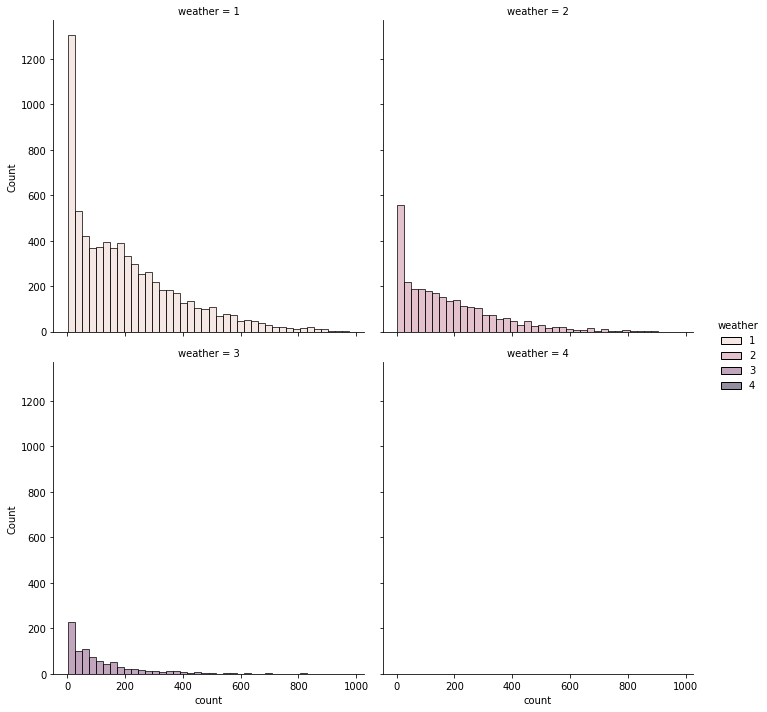

In [45]:
# histogram plot
sns.displot(data=data,x='count',col='weather',col_wrap=2,hue='weather',kind='hist',bins=40)

Weather **4** has almost no data.Also weather **3** has little data compared to weather **1** and **2**

The distribution are not normal ,they are rightly skewed

We will skip weather **4** from doing any hypothesis test as it has almost no data

## QQ plot

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


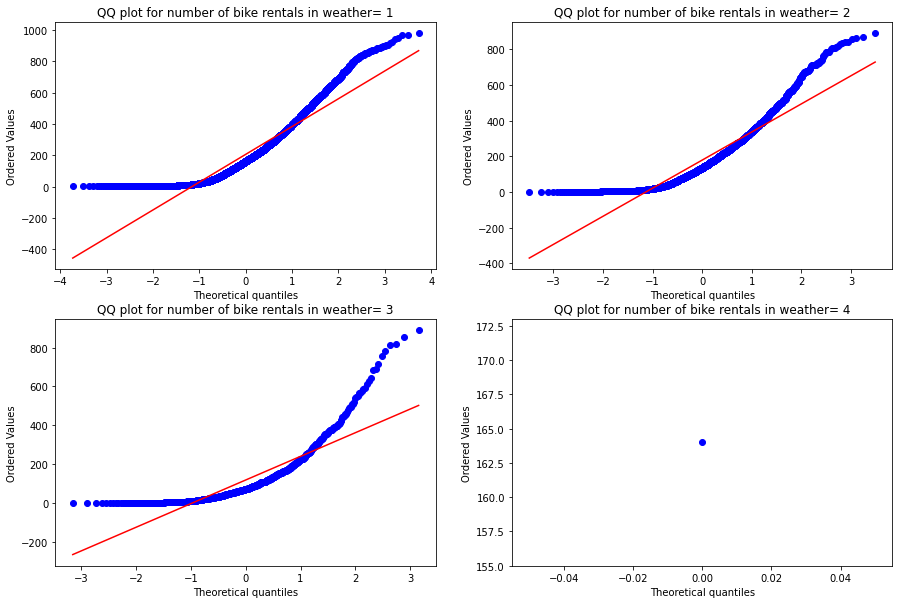

In [47]:
# QQ -plot
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten() # flatten the axes as ax was a 2D array ,flattening makes it a 1D array
weathers=data['weather'].unique()

for i in range(4):
  weather_data=data[data['weather']==weathers[i]]['count']
  st.probplot(weather_data, dist="norm", plot=ax[i]) # quantile plot with respect to theoretical normal data
  ax[i].set_title(f"QQ plot for number of bike rentals in weather= {weathers[i]}")
plt.show()

From QQ plot it is cristal clear that the bike rentals for each weather does not follow normal distrbution.
Alos they have heavy outliers

# Shapior-WIlk test for normality

  **H0: a sample x1, ..., xn came from a normally distributed population.** 

  **H1: Otherwise**

In [50]:
weather=data['weather'].unique()
for s in weather:
  if s!=4: # exclude weather 4
     print(f"Testing for normality of bike rentals in weather={s}:")
     test=st.shapiro(data[data['weather']==s]['count'].to_numpy())
     print(test)
     print("****************************************************")
     print()

Testing for normality of bike rentals in weather=1:
ShapiroResult(statistic=0.8909225463867188, pvalue=0.0)
****************************************************

Testing for normality of bike rentals in weather=2:
ShapiroResult(statistic=0.8767690658569336, pvalue=9.781063280987223e-43)
****************************************************

Testing for normality of bike rentals in weather=3:
ShapiroResult(statistic=0.7674333453178406, pvalue=3.876134581802921e-33)
****************************************************



/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


For every weather ,the number of bike rentals not following normal distribution as p-values are way less than 5% level of significance

# Second Assumption:Test for equal variance 

## Levene's test for equal variance: Leven's test is more robust to non-normality data compared to  F-test,bartlette test .

**H0: The variances of sample1,sample2,sample3,... are equal i.e all input samples are from populations with equal variances.**

**H1: Otherwise**

In [51]:
w1=data[data['weather']==1]['count']
w2=data[data['weather']==2]['count']
w3=data[data['weather']==3]['count']

# center=median will be used in the test, since the data has
# outliers therefore use median which is very much robust to outliers
# proportiontocut is the fraction to cut off of both tails of the distribution.
# this parameter is very usefull if the data has outliers
# from both side 0.01= 1% data will be ignored
test=st.levene(w1,w2,w3,center='median', proportiontocut=0.01)
print(test) 

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)


According to **Lvene's** test the variances of number of bike rentals is different in different weather as P-value is way less than 5% level of significance

## One-way anova: Since the data has very much outliers,checking for means equality would be misleading,what we can do we can remove the outliers. Then do the necessary testing

In [52]:
# removing outliers:Using simple method
w1=data[data['weather']==1]['count']
Q1=np.quantile(w1,0.25) # first quantile is the 25th percentile
Q3=np.quantile(w1,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
w1=w1.loc[(w1<=(Q3+1.5*IQR)) & (w1>=(Q1-1.5*IQR))]

w2=data[data['weather']==2]['count']
Q1=np.quantile(w2,0.25) # first quantile is the 25th percentile
Q3=np.quantile(w2,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
w2=w2.loc[(w2<=(Q3+1.5*IQR)) & (w2>=(Q1-1.5*IQR))]

w3=data[data['weather']==3]['count']
Q1=np.quantile(w3,0.25) # first quantile is the 25th percentile
Q3=np.quantile(w3,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
w3=w3.loc[(w3<=(Q3+1.5*IQR)) & (w3>=(Q1-1.5*IQR))]

# Now do the oneway anova
st.f_oneway(w1,w2,w3)


F_onewayResult(statistic=162.9056065738177, pvalue=2.0801584856212998e-70)

p-value is way less than 5% level of significance.Therefore the null hypothesis must go.That is the number of bike rentals is different in different weather

## We will carry out kruskals-Wallis test: This test is non-parameteric(no underlying assumption for the data unlike ANOVA) and also it is robust to outliers.

**Ho:Number of bike rentals is similar in different weathers**

**H1:Number of bike rentals is different in different weathers**


In [53]:
w1=data[data['weather']==1]['count']
w2=data[data['weather']==2]['count']
w3=data[data['weather']==3]['count']
st.kruskal(w1,w2,w3)

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

Kruska-Wallis test also fails to establish connection between no. of bike rentals in different weather.In other words no. of bike rentals is different in different weather

# Working Day has effect on number of electric cycles rented:2- Sample independent T-Test

Comparing average number of bike rentals in working and non-working day.

**Assumptions:**

1. Distribution of no.of bike rentals in working day is independent of no.bike of rentals in non-working day.

2. Population mean and standard devition are finite .

Standard deviation can be known,or unknown or equal variance.


Note: **T-test** for large of number of samples behaves almost similar to z-test

**H0: Average no. of bike rentals in working day is same as average number of bike rentals in non-working day.**

**H1: They are not**

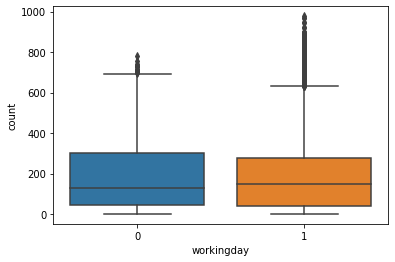

In [54]:
sns.boxplot(data=data,x='workingday',y='count')

Number of bike renatals for both working and non-working day has heavy number of outliers as per box plot

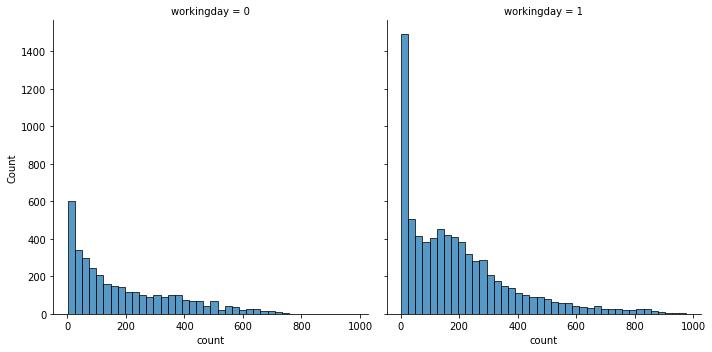

In [55]:
sns.displot(data=data,x='count',col='workingday',kind='hist',bins=40)

The data distribution for working and non-working days are right skewed.They are not not normal

# Since the data has outliers testing for means would be misleading .What we can do we can remove outliers and then perform t-test

In [60]:
# removing outliers using IQR 
working=data[data['workingday']==1]['count']
Q1=np.quantile(working,0.25) # first quantile is the 25th percentile
Q3=np.quantile(working,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
working=working.loc[(working<=(Q3+1.5*IQR)) & (working>=(Q1-1.5*IQR))]

# removing outliers using IQR 
nonworking=data[data['workingday']==0]['count']
Q1=np.quantile(nonworking,0.25) # first quantile is the 25th percentile
Q3=np.quantile(nonworking,0.75) # third quantile
IQR=Q3-Q1 # inter-quantile range
# remove those points which are less than Q1-1.5*IQR or more than Q3+1.5*IQR
nonworking=nonworking.loc[(nonworking<=(Q3+1.5*IQR)) & (nonworking>=(Q1-1.5*IQR))]


# Now perform 2 sample t-test

st.ttest_ind(working,nonworking,equal_var=False,random_state=0) # with unequal variance


Ttest_indResult(statistic=-4.3557584779909035, pvalue=1.3477043623680231e-05)

With 5% level of significance , working day has effect on the number of cycles rented.In other words number of rentals is different in working and non working day

# Ch-square-test:

**H0:Weather dependent on season**

**H1: Weather does not depend on season**

Note: Dependency will be measure best on total number of rentals for each weather and seasons 

In [102]:
observed_count_table=pd.crosstab(index=data['season'],columns=data['weather'],values=data['count'],aggfunc='sum',
                                 margins=False)
observed_count_table=observed_count_table.iloc[:,0:3] # drop weather 4 as weather 4 corresponds to single row only 

In [116]:
observed_count_table

weather,1,2,3
season,,,
fall,470116.0,139386.0,31160.0
spring,223009.0,76406.0,12919.0
summer,426350.0,134177.0,27755.0
winter,356588.0,157191.0,30255.0


In [117]:
# to calculate expected_freq table 
# you need to assume that weather does not depend on season
# pandas has a function called expected_freq but for clarity 
# I implemented it
def expected_freq(observed):
  observed=np.asarray(observed,dtype=np.float64)
  # calculate the sum of each column of the observed frequency
  col_sum=np.sum(observed,axis=0)
  total_sum=observed.sum() # total sum
  prob_col=col_sum/total_sum

  # now calculate expected frequency for each cell in the observed data
  results=[]
  m,n=observed.shape
  for i in range(m):
    row_i=[]
    row_i_sum=sum(observed[i])
    for j in range(n):
      row_i.append(prob_col[j]*row_i_sum)
    results.append(row_i)
  return np.asarray(results,dtype=np.float64)

In [118]:
expected_freq_count=expected_freq(observed_count_table.to_numpy())

In [119]:
expected_freq_count

array([[453484.88557396, 155812.72247031,  31364.39195574],
       [221081.86259035,  75961.44434981,  15290.69305984],
       [416408.3330293 , 143073.60199337,  28800.06497733],
       [385087.91880639, 132312.23118651,  26633.8500071 ]])

In [120]:
expected_freq=st.contingency.expected_freq(observed_count_table.to_numpy()) # expected frequency ,pandas bultin

In [121]:
expected_freq

array([[453484.88557396, 155812.72247031,  31364.39195574],
       [221081.86259035,  75961.44434981,  15290.69305984],
       [416408.3330293 , 143073.60199337,  28800.06497733],
       [385087.91880639, 132312.23118651,  26633.8500071 ]])

In [124]:
# now do the chi-square test
st.chisquare(observed_count_table.to_numpy().ravel(),expected_freq_count.ravel())

Power_divergenceResult(statistic=10838.372332480209, pvalue=0.0)

Since the p-value is 0.0 which is less than 5% level of significance therefore we need to reject null hypothesis .In other words weather does not depend on season

# Summary Insights:

1. Every season plays an important role for the demand of cycles.The demand is different for different season

2. Similarly weather also plays an important role.The demand is different for different weather.

3. Weathers does not depend on seasons

4. Working and non-working day also effects the number of rentals.The number is different.

5. Temperature and humidity are good factors for the demand of cycles.In high temperature people don't bother to go for a ride.

# Recommendations:

1. Supply of cyles can be increased in fall and spring

2. Increase stock of cycles during good weather like with clear sky,little cloudy.

3. Do not treat working and non-working day with same importance.

4. Increase stock of cycles when the temperature is in the range of 20 to 30 degrees.